# **Day 3: Computer Vision with OpenCV**
This notebook provides hands-on examples and explanations for using OpenCV in Python for computer vision tasks.

## **Installing OpenCV**
To install OpenCV in Google Colab, run the following command:

In [ ]:
!pip install opencv-python

### **Importing Required Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **1. Image Processing Basics**
### **Reading, Displaying, and Saving Images**

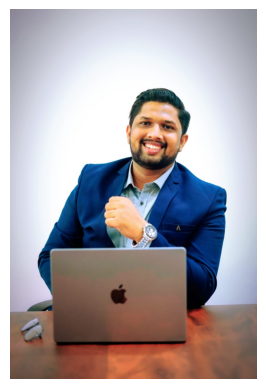

True

In [ ]:
# Load an image
image = cv2.imread("/WhatsApp Image 2025-02-09 at 1.48.47 PM.jpeg")
# Convert to RGB for correct Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
# Save the processed image
cv2.imwrite("output.jpg", image)

### **Applying Filters and Transformations**
#### **1. Edge Detection (Canny Edge Detection)**

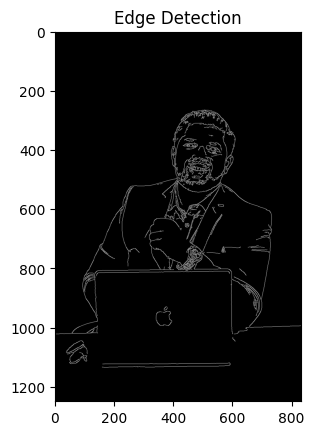

In [ ]:
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

#### **2. Thresholding (Convert Image to Binary)**

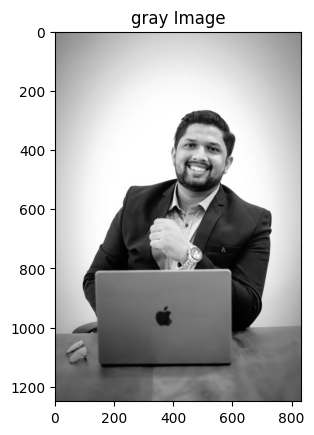

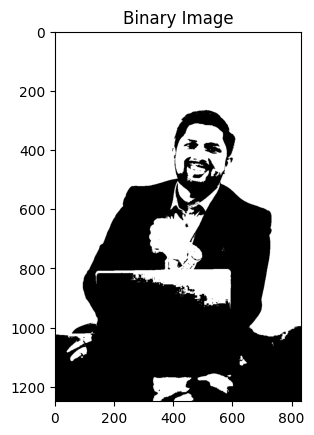

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('gray Image')
plt.show()
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.show()

#### **3. Morphological Operations (Erosion and Dilation)**

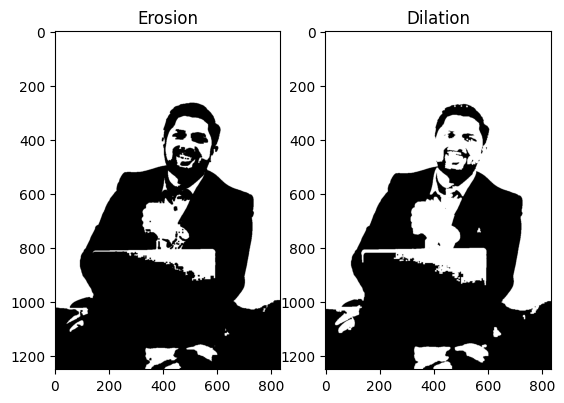

In [ ]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
plt.subplot(1,2,1)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.subplot(1,2,2)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.show()

## **2. Object Recognition and Tracking**
### **Basic Object Detection Using Color Segmentation**

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('Original', frame)
    cv2.imshow('Red Detection', result)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## **3. Pose Estimation Project**
To detect human body landmarks, we will use the **MediaPipe** library.

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 33.5 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_draw = mp.solutions.drawing_utils
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    if results.pose_landmarks:
        mp_draw.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imshow('Pose Estimation', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## **Conclusion**
- OpenCV is a powerful tool for image processing and computer vision.
- Image transformations like edge detection and thresholding help in object recognition.
- Object tracking can be done using color segmentation and motion tracking.
- Pose estimation enables real-time human body tracking for applications like gesture recognition.
This knowledge forms the foundation for more advanced AI applications in robotics. 🚀

# Invisible Cloak

In [ ]:
import cv2
import numpy as np
import time

# Start the webcam
cap = cv2.VideoCapture(0)
time.sleep(3)  # Allow the camera to adjust

# Capture the background
background = None
for i in range(50):
    ret, background = cap.read()

# Flip the background for consistency
background = cv2.flip(background, 1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame for consistency
    frame = cv2.flip(frame, 1)

    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define HSV range for the cloak color (Red)
    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])

    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])

    # Create masks to detect red color
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    mask = mask1 + mask2  # Combine both masks

    # Refine the mask using morphological operations
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3, 3), np.uint8))

    # Create an inverse mask
    mask_inv = cv2.bitwise_not(mask)

    # Replace the detected red area with the background
    res1 = cv2.bitwise_and(background, background, mask=mask)
    res2 = cv2.bitwise_and(frame, frame, mask=mask_inv)

    # Combine both results
    final_output = cv2.addWeighted(res1, 1, res2, 1, 0)

    # Display the output
    cv2.imshow("Invisible Cloak", final_output)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
